## 1. Load and Combine Data

In [2]:
# Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create an array of years to load movie datasets from GitHub
years_arange = np.arange(1970, 2030, 10)

In [4]:
# Initialize a list to store dataframes for each year
dataframes = []

# Load JSON files for each year and append to the list
for year in years_arange:
    url = f"https://raw.githubusercontent.com/prust/wikipedia-movie-data/refs/heads/master/movies-{year}s.json"
    file = pd.read_json(url)
    dataframes.append(file)

In [5]:
# Combine all yearly dataframes into a single dataframe
df = pd.concat(dataframes, ignore_index=True)

In [6]:
# Display the number of rows and columns in the combined dataset
df.shape

(12833, 9)

In [7]:
# Display the first few rows of the combined dataset
df.head()

,title,year,cast,genres,href,extract,thumbnail,thumbnail_width,thumbnail_height
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],"[Documentary, Sports]",A.k.a._Cassius_Clay,A.k.a. Cassius Clay is a 1970 boxing documenta...,https://upload.wikimedia.org/wikipedia/en/1/17...,264.0,376.0
1,Adam at Six A.M.,1970,"[Michael Douglas, Lee Purcell, Joe Don Baker, ...",[Drama],Adam_at_Six_A.M.,Adam at 6 A.M. is a 1970 American drama film d...,https://upload.wikimedia.org/wikipedia/en/4/43...,256.0,389.0
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...","[Historical, Drama]",Adam%27s_Woman,Adam's Woman is a 1970 Australian-American his...,https://upload.wikimedia.org/wikipedia/en/8/85...,264.0,376.0
3,The Adventurers,1970,"[Bekim Fehmiu, Candice Bergen, Charles Aznavou...","[Drama, Adventure]",The_Adventurers_(1970_film),The Adventurers is a 1970 American adventure d...,https://upload.wikimedia.org/wikipedia/en/1/1c...,256.0,390.0
4,Airport,1970,"[Burt Lancaster, Dean Martin, Jean Seberg, Jac...","[Disaster, Drama]",Airport_(1970_film),Airport is a 1970 American air disaster–drama ...,https://upload.wikimedia.org/wikipedia/en/4/4f...,255.0,390.0


In [8]:
# Display the column names of the combined dataset
df.columns

Index(['title', 'year', 'cast', 'genres', 'href', 'extract', 'thumbnail',
       'thumbnail_width', 'thumbnail_height'],
      dtype='object')

In [9]:
# List of unnecessary columns to remove from the dataset
drop_columns = ['href', 'extract', 'thumbnail', 'thumbnail_width', 'thumbnail_height']

In [10]:
# Remove unnecessary columns from the dataset
df.drop(columns=drop_columns, inplace=True)

In [11]:
df.head()

,title,year,cast,genres
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],"[Documentary, Sports]"
1,Adam at Six A.M.,1970,"[Michael Douglas, Lee Purcell, Joe Don Baker, ...",[Drama]
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...","[Historical, Drama]"
3,The Adventurers,1970,"[Bekim Fehmiu, Candice Bergen, Charles Aznavou...","[Drama, Adventure]"
4,Airport,1970,"[Burt Lancaster, Dean Martin, Jean Seberg, Jac...","[Disaster, Drama]"


In [12]:
# Check for missing values in each column
df.isna().sum()

title     0
year      0
cast      0
genres    0
dtype: int64

## 2. Check the size of the final dataset and save a backup
### The dataset should have 4 columns; the number of rows depends on the selected files

In [13]:
df.shape

(12833, 4)

In [14]:
df.head()

,title,year,cast,genres
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],"[Documentary, Sports]"
1,Adam at Six A.M.,1970,"[Michael Douglas, Lee Purcell, Joe Don Baker, ...",[Drama]
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...","[Historical, Drama]"
3,The Adventurers,1970,"[Bekim Fehmiu, Candice Bergen, Charles Aznavou...","[Drama, Adventure]"
4,Airport,1970,"[Burt Lancaster, Dean Martin, Jean Seberg, Jac...","[Disaster, Drama]"


In [15]:
# Save the combined dataset as a CSV file
df.to_csv('kino.csv', index=False)

In [16]:
# Display summary information about the dataset, including column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   12833 non-null  object
 1   year    12833 non-null  int64 
 2   cast    12833 non-null  object
 3   genres  12833 non-null  object
dtypes: int64(1), object(3)
memory usage: 401.2+ KB


In [17]:
# Check for missing values in the 'genres' column
df['genres'].isna().sum()

np.int64(0)

## 3. Analyze genres:
### Find the top 10 genres by number of movies
### Plot bar and pie charts, and display a summary table

In [18]:
# Expand the 'genres' column so each genre has its own row
df_long_genres = df.explode('genres')
df_long_genres

,title,year,cast,genres
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],Documentary
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],Sports
1,Adam at Six A.M.,1970,"[Michael Douglas, Lee Purcell, Joe Don Baker, ...",Drama
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...",Historical
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...",Drama
...,...,...,...,...
12830,Rebel Moon,2023,"[Sofia Boutella, Charlie Hunnam, Ray Fisher, D...",Science Fiction
12831,Migration,2023,[],NaN
12832,The Color Purple,2023,"[Fantasia Barrino, Colman Domingo, Corey Hawki...",Drama
12832,The Color Purple,2023,"[Fantasia Barrino, Colman Domingo, Corey Hawki...",Musical


In [19]:
# Remove rows with missing values in the 'genres' column
# Reassign the result back to df_long_genres
df_long_genres = df_long_genres[~df_long_genres['genres'].isna()]
df_long_genres

,title,year,cast,genres
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],Documentary
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],Sports
1,Adam at Six A.M.,1970,"[Michael Douglas, Lee Purcell, Joe Don Baker, ...",Drama
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...",Historical
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...",Drama
...,...,...,...,...
12829,Untitled Ghostbusters: Afterlife sequel,2023,"[Mckenna Grace, Carrie Coon, Finn Wolfhard, Pa...",Supernatural
12830,Rebel Moon,2023,"[Sofia Boutella, Charlie Hunnam, Ray Fisher, D...",Science Fiction
12832,The Color Purple,2023,"[Fantasia Barrino, Colman Domingo, Corey Hawki...",Drama
12832,The Color Purple,2023,"[Fantasia Barrino, Colman Domingo, Corey Hawki...",Musical


In [20]:
# Count the number of movies per genre and create a summary table
top_genres = df_long_genres.genres.value_counts().reset_index()
top_genres

,genres,count
0,Comedy,4446
1,Drama,4368
2,Action,1744
3,Thriller,1608
4,Horror,1367
5,Romance,1197
6,Crime,920
7,Science Fiction,867
8,Fantasy,611
9,Adventure,606


In [21]:
# Select the top 10 genres from the summary table
top_10_genres = top_genres.iloc[0:10, 0:10]
top_10_genres

,genres,count
0,Comedy,4446
1,Drama,4368
2,Action,1744
3,Thriller,1608
4,Horror,1367
5,Romance,1197
6,Crime,920
7,Science Fiction,867
8,Fantasy,611
9,Adventure,606


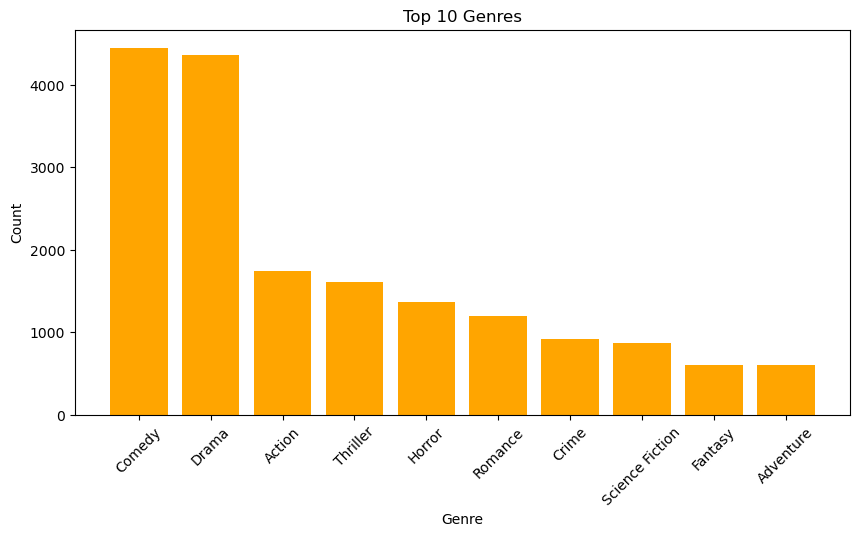

In [22]:
# Plot a bar chart of the top 10 genres
plt.figure(figsize=(10,5))
plt.bar(top_10_genres['genres'], top_10_genres['count'], color='orange')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Genres')
plt.show()

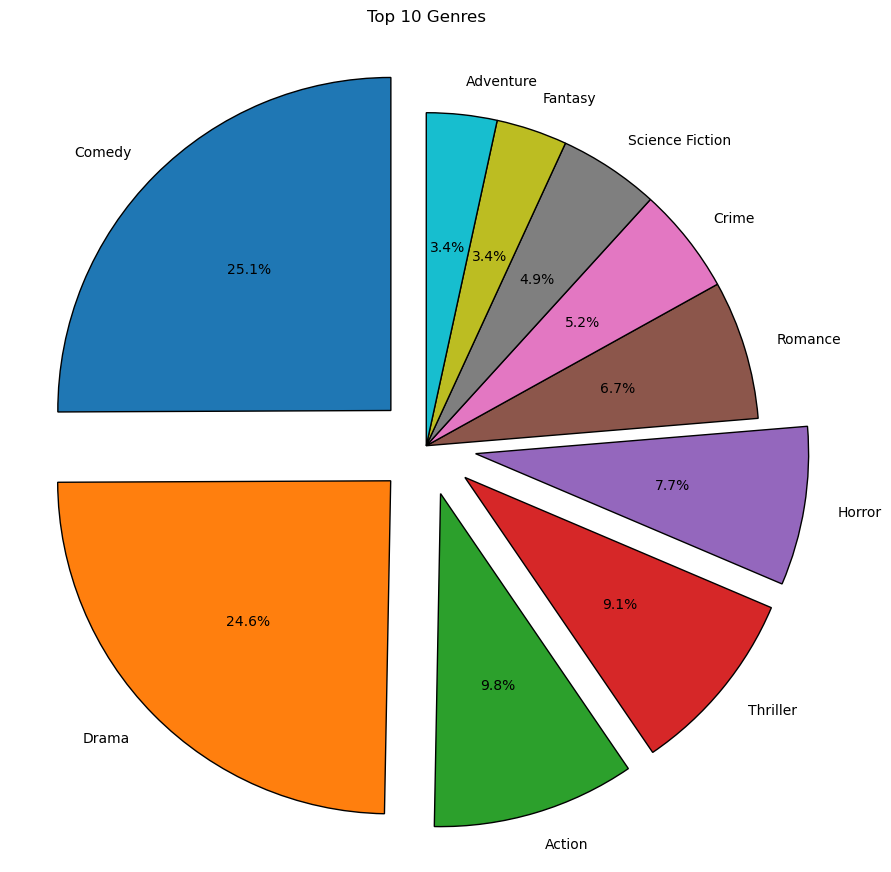

In [41]:
# Plot a pie chart of the top 10 genres
plt.figure(figsize=(9,9))

# Highlight the top 5 genres
explode = [0.15 if i < 5 else 0 for i in range(len(top_10_genres))]

plt.pie(
    top_10_genres['count'],
    labels=top_10_genres['genres'],
    explode=explode,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Top 10 Genres')
plt.tight_layout()
plt.show()

**Summary of Top Genres:**

- **Most popular genres (Top 5):** Comedy, Drama, Action, Thriller, Horror.  
  These make up the majority of movies in the dataset, with Comedy and Drama accounting for roughly half of all films.

- **Less popular genres:** Romance, Crime, Science Fiction, Fantasy, Adventure.  
  These have a much smaller share and form a niche with lower audience demand.

## 4. Analyze trends for the top 3 genres over time
## Count the number of movies in each genre per year and plot a line chart

In [42]:
# Create a list of the top 3 genres
top_3_genres_list = top_genres.genres[0:3].tolist()
top_3_genres_list

['Comedy', 'Drama', 'Action']

In [43]:
# Filter the dataset to include only the top 3 genres
mask_genre = df_long_genres.genres.apply(lambda x: True if x in top_3_genres_list else False)
df_selected_genre = df_long_genres[mask_genre]

# Display summary information of the filtered dataset
df_selected_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10558 entries, 1 to 12832
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10558 non-null  object
 1   year    10558 non-null  int64 
 2   cast    10558 non-null  object
 3   genres  10558 non-null  object
dtypes: int64(1), object(3)
memory usage: 412.4+ KB


In [44]:
# Display the first few rows of the filtered dataset for the top 3 genres
df_selected_genre.head()

,title,year,cast,genres
1,Adam at Six A.M.,1970,"[Michael Douglas, Lee Purcell, Joe Don Baker, ...",Drama
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...",Drama
3,The Adventurers,1970,"[Bekim Fehmiu, Candice Bergen, Charles Aznavou...",Drama
4,Airport,1970,"[Burt Lancaster, Dean Martin, Jean Seberg, Jac...",Drama
5,Alex in Wonderland,1970,"[Donald Sutherland, Ellen Burstyn, Federico Fe...",Comedy


In [45]:
# Count the number of movies per genre in the filtered dataset and create a summary table
df_selected_genre.genres.value_counts().reset_index()

,genres,count
0,Comedy,4446
1,Drama,4368
2,Action,1744


In [46]:
# Calculate the total number of movies in the filtered top 3 genres
df_selected_genre.genres.value_counts().reset_index().sum()

genres    ComedyDramaAction
count                 10558
dtype: object

Відсіяні значення по жанрам групуємо по роках

In [47]:
# Aggregate the number of movies per year for each of the top 3 genres
df_plot = df_selected_genre.groupby('year').genres.value_counts().reset_index()
df_plot

,year,genres,count
0,1970,Drama,70
1,1970,Comedy,55
2,1970,Action,8
3,1971,Drama,58
4,1971,Comedy,40
...,...,...,...
157,2022,Drama,90
158,2022,Action,47
159,2023,Comedy,60
160,2023,Drama,43


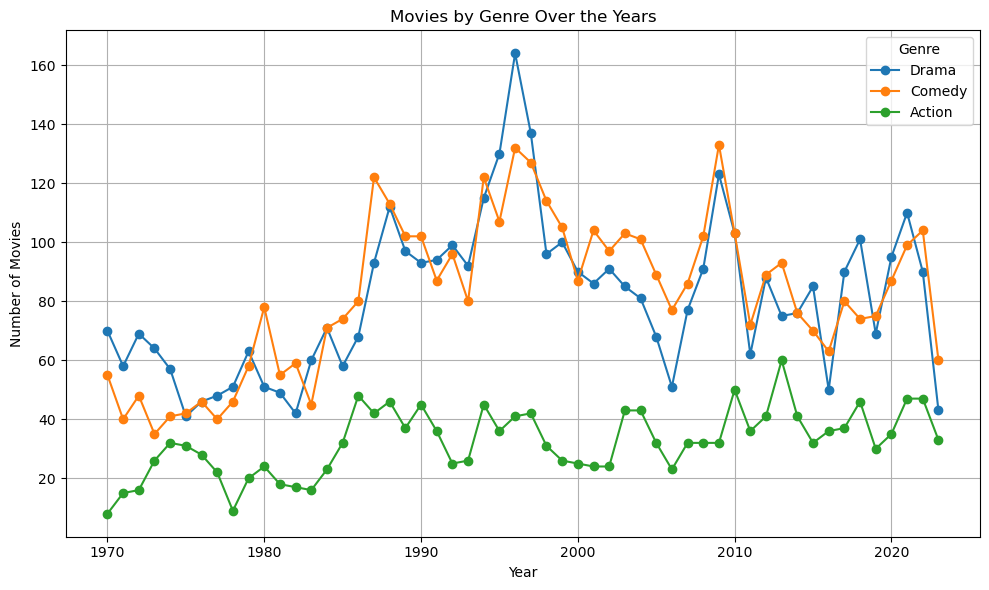

In [48]:
# Plot a line chart showing the number of movies per year for each of the top 3 genres
plt.figure(figsize=(10,6))

for genre in df_plot['genres'].unique():
    data = (
        df_plot[df_plot['genres'] == genre]
        .sort_values('year')
    )

    plt.plot(
        data['year'],
        data['count'],
        marker='o',
        label=genre
    )

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Genre Over the Years')
plt.legend(title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary of Genre Trends:**

- Overall, the number of movies increased until the mid-1990s, after which it fluctuated.  
- Drama and Comedy dominate in volume, with noticeable peaks in the 1990s and early 2010s.  
- Action shows a more stable but smaller production volume over the years.

## 5. Analyze actors:
### Find the top 10 actors by number of movies
### Plot a bar or pie chart, and display a summary table

In [49]:
# Expand the 'cast' column so each actor has their own row
df_long_actors = df.explode('cast')

# Display the first few rows of the expanded dataset
df_long_actors

,title,year,cast,genres
0,A.k.a. Cassius Clay,1970,Muhammad Ali,"[Documentary, Sports]"
1,Adam at Six A.M.,1970,Michael Douglas,[Drama]
1,Adam at Six A.M.,1970,Lee Purcell,[Drama]
1,Adam at Six A.M.,1970,Joe Don Baker,[Drama]
1,Adam at Six A.M.,1970,Louise Latham,[Drama]
...,...,...,...,...
12832,The Color Purple,2023,Elizabeth Marvel,"[Drama, Musical, Historical]"
12832,The Color Purple,2023,Jon Batiste,"[Drama, Musical, Historical]"
12832,The Color Purple,2023,Louis Gossett Jr.,"[Drama, Musical, Historical]"
12832,The Color Purple,2023,David Alan Grier,"[Drama, Musical, Historical]"


In [50]:
# Remove rows with missing values in the 'cast' column
df_long_actors = df_long_actors[~df_long_actors['cast'].isna()]

# Display the first few rows of the cleaned actor dataset
df_long_actors

,title,year,cast,genres
0,A.k.a. Cassius Clay,1970,Muhammad Ali,"[Documentary, Sports]"
1,Adam at Six A.M.,1970,Michael Douglas,[Drama]
1,Adam at Six A.M.,1970,Lee Purcell,[Drama]
1,Adam at Six A.M.,1970,Joe Don Baker,[Drama]
1,Adam at Six A.M.,1970,Louise Latham,[Drama]
...,...,...,...,...
12832,The Color Purple,2023,Elizabeth Marvel,"[Drama, Musical, Historical]"
12832,The Color Purple,2023,Jon Batiste,"[Drama, Musical, Historical]"
12832,The Color Purple,2023,Louis Gossett Jr.,"[Drama, Musical, Historical]"
12832,The Color Purple,2023,David Alan Grier,"[Drama, Musical, Historical]"


In [51]:
# Count the number of movies per actor and create a summary table
top_actors = df_long_actors['cast'].value_counts().reset_index()
top_actors

,cast,count
0,Bruce Willis,104
1,Samuel L. Jackson,95
2,Robert De Niro,88
3,Dennis Quaid,72
4,Morgan Freeman,72
...,...,...
22673,David Fane,1
22674,Lehi Falepapalangi,1
22675,Semu Filipo,1
22676,Uli Latukefu,1


In [52]:
# Select the top 10 actors from the summary table
top_10_actors = top_actors.iloc[0:10, 0:10]
top_10_actors

,cast,count
0,Bruce Willis,104
1,Samuel L. Jackson,95
2,Robert De Niro,88
3,Dennis Quaid,72
4,Morgan Freeman,72
5,Liam Neeson,71
6,Robert Duvall,71
7,Nicolas Cage,71
8,Willem Dafoe,69
9,Donald Sutherland,69


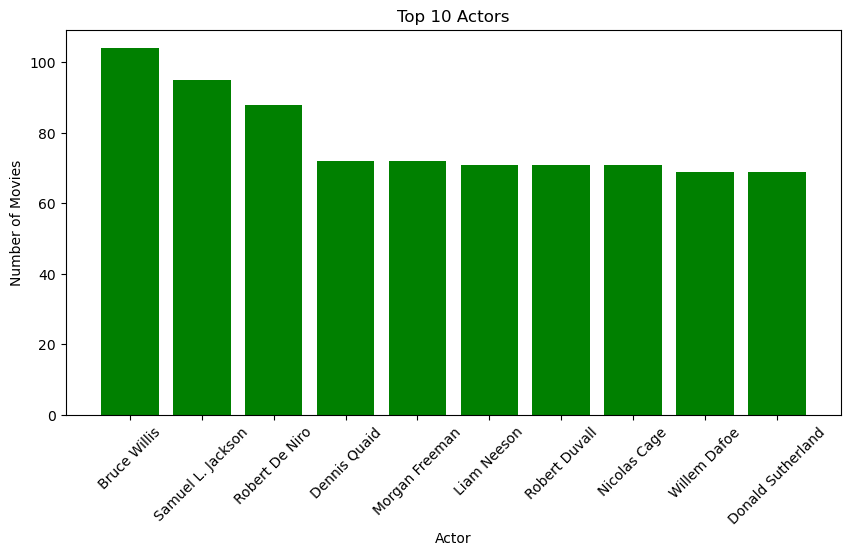

In [53]:
# Plot a bar chart of the top 10 actors
plt.figure(figsize=(10,5))
plt.bar(top_10_actors['cast'], top_10_actors['count'], color='green')
plt.xticks(rotation=45)
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Top 10 Actors')
plt.show()

**Summary of Top Actors:**

- **Leader:** Bruce Willis with over 100 movies, making him the most active among the top 10.  
- **Followed by:** Samuel L. Jackson and Robert De Niro, noticeably fewer but still over 85–90 movies.  
- **Remaining actors:** Around 70–72 movies each, including Morgan Freeman, Liam Neeson, Robert Duvall, Nicolas Cage, Willem Dafoe, and Donald Sutherland.  

The trend shows that the top 3 actors stand out significantly, while the rest are nearly equal in activity.

## 6. Analyze trends for the top 3 actors over time
### Count the number of movies for each actor per year and plot a line chart

In [54]:
# Create a list of the top 3 actors for trend analysis
top_3_actors_list = top_actors.cast[0:3].tolist()
top_3_actors_list

['Bruce Willis', 'Samuel L. Jackson', 'Robert De Niro']

In [55]:
# Filter the dataset to include only the top 3 actors
mask_actors = df_long_actors.cast.apply(lambda x: True if x in top_3_actors_list else False)
df_selected_actors = df_long_actors[mask_actors]

# Display summary information of the filtered dataset
df_selected_actors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 52 to 12814
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   287 non-null    object
 1   year    287 non-null    int64 
 2   cast    287 non-null    object
 3   genres  287 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.2+ KB


**Summary of Top 3 Actors:**

The top 3 actors appeared in a total of 287 movies.

In [56]:
df_selected_actors.head()

,title,year,cast,genres
52,"Hi, Mom!",1970,Robert De Niro,[Comedy]
208,The Gang That Couldn't Shoot Straight,1971,Robert De Niro,"[Comedy, Crime]"
523,Bang the Drum Slowly,1973,Robert De Niro,"[Sports, Drama]"
615,Mean Streets,1973,Robert De Niro,"[Drama, Crime]"
749,The Godfather Part II,1974,Robert De Niro,"[Crime, Drama]"


In [57]:
# Aggregate the number of movies per year for each of the top 3 actors
df_plot_actors = df_selected_actors.groupby('year').cast.value_counts().reset_index()
df_plot_actors

,year,cast,count
0,1970,Robert De Niro,1
1,1971,Robert De Niro,1
2,1973,Robert De Niro,2
3,1974,Robert De Niro,1
4,1976,Robert De Niro,2
...,...,...,...
112,2022,Samuel L. Jackson,2
113,2022,Robert De Niro,1
114,2023,Bruce Willis,2
115,2023,Robert De Niro,2


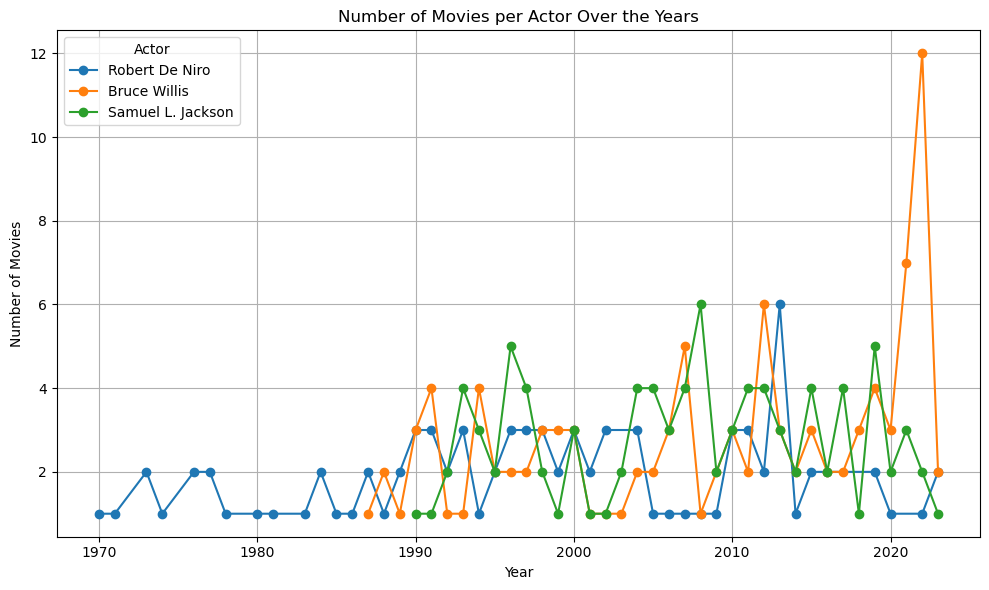

In [58]:
# Plot a line chart showing the number of movies per year for each of the top 3 actors
plt.figure(figsize=(10,6))

for cast in df_plot_actors['cast'].unique():
    data = (
        df_plot_actors[df_plot_actors['cast'] == cast]
        .sort_values('year')
    )

    plt.plot(
        data['year'],
        data['count'],
        marker='o',
        label=cast
    )

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Actor Over the Years')
plt.legend(title='Actor')
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary of Top 3 Actors' Career Trends:**

This chart demonstrates the productivity of three Hollywood titans over the last decades. Each has a unique career "signature".

- **Robert De Niro (blue line) – "The Marathoner"**  
  - **Start:** Earliest presence on the chart, from 1970.  
  - **Trend:** Most stable career. Between 1970–1990, maintained a low but steady pace (1–2 movies per year).  
  - **Peak:** Activity spike in 2013 (6 movies), then returned to his usual rhythm.

- **Samuel L. Jackson (green line) – "The Hardest Worker"**  
  - **Start:** Appears in the late 1980s.  
  - **Trend:** From the mid-1990s, shows remarkable activity, rarely releasing fewer than 2 movies per year.  
  - **Feature:** His chart is very dynamic with frequent peaks of 4–6 movies (notably in 1996, 2008, and 2019).

- **Bruce Willis (orange line) – "The Final Sprint"**  
  - **Start:** Begins active phase in the mid-1980s.  
  - **Trend:** For a long time, maintained levels similar to peers, but recent years (after 2018) show an unusual increase.  
  - **Record:** Spike in 2022 (12 movies), the highest point on the chart, reflecting a period of extremely high activity before announcing retirement.

**Overall Conclusion:**  
Although De Niro started earlier than the others, Samuel L. Jackson appears to be the most consistently in-demand over the last 30 years. Bruce Willis, however, holds the absolute single-year record, representing a true "production surge".

In [59]:
# Filter the dataset for Bruce Willis in the year 2022 to examine his record activity
df_bruce_2022 = df_long_actors[
    (df_long_actors['cast'] == 'Bruce Willis') &
    (df_long_actors['year'] == 2022)
]
df_bruce_2022

,title,year,cast,genres
12318,American Siege,2022,Bruce Willis,[Action]
12355,Gasoline Alley,2022,Bruce Willis,"[Action, Thriller, War]"
12359,A Day to Die,2022,Bruce Willis,[Action]
12399,Fortress: Sniper's Eye,2022,Bruce Willis,[Action]
12401,Corrective Measures,2022,Bruce Willis,[Superhero]
12414,Vendetta,2022,Bruce Willis,"[Action, Thriller]"
12432,White Elephant,2022,Bruce Willis,[Action]
12466,Wrong Place,2022,Bruce Willis,[Action]
12507,Wire Room,2022,Bruce Willis,[Action]
12570,Detective Knight: Rogue,2022,Bruce Willis,"[Action, War]"


### Verify Bruce Willis's 2022 data to ensure calculations are correct

## Bonus Task:
### Focus on the top 10 actors
### Calculate how often each actor appears in movies belonging to the top 3 genres
### and how often in movies outside these genres
### Display the proportions as a bar chart and as a summary table including the percentage of movies in top genres

In [60]:
# Create a list of the top 10 actors for the bonus analysis
top_10_actors_list = top_actors.cast[0:10].tolist()
top_10_actors_list

['Bruce Willis',
 'Samuel L. Jackson',
 'Robert De Niro',
 'Dennis Quaid',
 'Morgan Freeman',
 'Liam Neeson',
 'Robert Duvall',
 'Nicolas Cage',
 'Willem Dafoe',
 'Donald Sutherland']

In [64]:
# List of the top 3 most popular genres
top_3_genres_list

['Comedy', 'Drama', 'Action']

In [65]:
# Filter dataset to include only the top 10 most frequent actors
df_top_actors = df_long_actors[df_long_actors['cast'].isin(top_10_actors_list)]
df_top_actors

,title,year,cast,genres
5,Alex in Wonderland,1970,Donald Sutherland,"[Comedy, Drama]"
52,"Hi, Mom!",1970,Robert De Niro,[Comedy]
64,Kelly's Heroes,1970,Donald Sutherland,"[War, Action, Comedy, Drama]"
81,M*A*S*H,1970,Donald Sutherland,"[Comedy, War]"
81,M*A*S*H,1970,Robert Duvall,"[Comedy, War]"
...,...,...,...,...
12780,Sympathy for the Devil,2023,Nicolas Cage,[Horror]
12790,The Hill,2023,Dennis Quaid,"[Drama, Sports, Biography]"
12803,Killers of the Flower Moon,2023,Robert De Niro,"[Crime, Drama, Western]"
12814,The Marvels,2023,Samuel L. Jackson,[Superhero]


Список фільмів з топ 3 жанрів

In [66]:
# Filter dataset to include only movies belonging to the top 3 genres
df_top_3_genre_films = df_long_genres[df_long_genres['genres'].isin(top_3_genres_list)]
df_top_3_genre_films

,title,year,cast,genres
1,Adam at Six A.M.,1970,"[Michael Douglas, Lee Purcell, Joe Don Baker, ...",Drama
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...",Drama
3,The Adventurers,1970,"[Bekim Fehmiu, Candice Bergen, Charles Aznavou...",Drama
4,Airport,1970,"[Burt Lancaster, Dean Martin, Jean Seberg, Jac...",Drama
5,Alex in Wonderland,1970,"[Donald Sutherland, Ellen Burstyn, Federico Fe...",Comedy
...,...,...,...,...
12820,A Family Affair,2023,"[Nicole Kidman, Zac Efron, Joey King, Liza Kos...",Comedy
12823,Napoleon,2023,"[Joaquin Phoenix, Vanessa Kirby, Tahar Rahim]",Drama
12826,Magazine Dreams,2023,"[Jonathan Majors, Haley Bennett, Taylour Paige...",Drama
12829,Untitled Ghostbusters: Afterlife sequel,2023,"[Mckenna Grace, Carrie Coon, Finn Wolfhard, Pa...",Comedy


In [67]:
# Expand the top 3 genres dataset so each actor has their own row
df_top_10_actors_3_genre_long = df_top_3_genre_films.explode('cast')
df_top_10_actors_3_genre_long

,title,year,cast,genres
1,Adam at Six A.M.,1970,Michael Douglas,Drama
1,Adam at Six A.M.,1970,Lee Purcell,Drama
1,Adam at Six A.M.,1970,Joe Don Baker,Drama
1,Adam at Six A.M.,1970,Louise Latham,Drama
2,Adam's Woman,1970,Beau Bridges,Drama
...,...,...,...,...
12832,The Color Purple,2023,Elizabeth Marvel,Drama
12832,The Color Purple,2023,Jon Batiste,Drama
12832,The Color Purple,2023,Louis Gossett Jr.,Drama
12832,The Color Purple,2023,David Alan Grier,Drama


In [69]:
# Filter to include only the top 10 actors within the top 3 genres
df_top_10_actors_in_3_genre = df_top_10_actors_3_genre_long[df_top_10_actors_3_genre_long['cast'].isin(top_10_actors_list)]
df_top_10_actors_in_3_genre

,title,year,cast,genres
5,Alex in Wonderland,1970,Donald Sutherland,Comedy
5,Alex in Wonderland,1970,Donald Sutherland,Drama
52,"Hi, Mom!",1970,Robert De Niro,Comedy
64,Kelly's Heroes,1970,Donald Sutherland,Action
64,Kelly's Heroes,1970,Donald Sutherland,Comedy
...,...,...,...,...
12750,About My Father,2023,Robert De Niro,Comedy
12762,Asteroid City,2023,Willem Dafoe,Comedy
12762,Asteroid City,2023,Willem Dafoe,Drama
12790,The Hill,2023,Dennis Quaid,Drama


Рахуємо топ 10 акторів по топ 3 жанрах

In [70]:
# Count the number of movies each of the top 10 actors appears in within the top 3 genres
top3_counts = df_top_10_actors_in_3_genre.value_counts('cast').reset_index()
top3_counts

,cast,count
0,Bruce Willis,107
1,Robert De Niro,86
2,Dennis Quaid,69
3,Samuel L. Jackson,67
4,Liam Neeson,63
5,Robert Duvall,63
6,Nicolas Cage,62
7,Morgan Freeman,59
8,Donald Sutherland,57
9,Willem Dafoe,47


In [73]:
# Create a dataset of movies that do NOT belong to the top 3 genres
df_not_top = df_long_genres[~df_long_genres['genres'].isin(top_3_genres_list)]
df_not_top

,title,year,cast,genres
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],Documentary
0,A.k.a. Cassius Clay,1970,[Muhammad Ali],Sports
2,Adam's Woman,1970,"[Beau Bridges, Jane Merrow, John Mills, James ...",Historical
3,The Adventurers,1970,"[Bekim Fehmiu, Candice Bergen, Charles Aznavou...",Adventure
4,Airport,1970,"[Burt Lancaster, Dean Martin, Jean Seberg, Jac...",Disaster
...,...,...,...,...
12828,Aquaman and the Lost Kingdom,2023,"[Jason Momoa, Amber Heard, Willem Dafoe, Patri...",Superhero
12829,Untitled Ghostbusters: Afterlife sequel,2023,"[Mckenna Grace, Carrie Coon, Finn Wolfhard, Pa...",Supernatural
12830,Rebel Moon,2023,"[Sofia Boutella, Charlie Hunnam, Ray Fisher, D...",Science Fiction
12832,The Color Purple,2023,"[Fantasia Barrino, Colman Domingo, Corey Hawki...",Musical


In [75]:
# Expand the dataset of movies not in the top 3 genres so each actor has their own row
df_not_top_long = df_not_top.explode('cast')
df_not_top_long

,title,year,cast,genres
0,A.k.a. Cassius Clay,1970,Muhammad Ali,Documentary
0,A.k.a. Cassius Clay,1970,Muhammad Ali,Sports
2,Adam's Woman,1970,Beau Bridges,Historical
2,Adam's Woman,1970,Jane Merrow,Historical
2,Adam's Woman,1970,John Mills,Historical
...,...,...,...,...
12832,The Color Purple,2023,Elizabeth Marvel,Historical
12832,The Color Purple,2023,Jon Batiste,Historical
12832,The Color Purple,2023,Louis Gossett Jr.,Historical
12832,The Color Purple,2023,David Alan Grier,Historical


In [77]:
# Filter to include only the top 10 actors in movies outside the top 3 genres
df_top_10_actors_all_genre = df_not_top_long[df_not_top_long['cast'].isin(top_10_actors_list)]
df_top_10_actors_all_genre

,title,year,cast,genres
64,Kelly's Heroes,1970,Donald Sutherland,War
81,M*A*S*H,1970,Donald Sutherland,War
81,M*A*S*H,1970,Robert Duvall,War
115,The Revolutionary,1970,Robert Duvall,Political
123,Start the Revolution Without Me,1970,Donald Sutherland,Historical
...,...,...,...,...
12790,The Hill,2023,Dennis Quaid,Biography
12803,Killers of the Flower Moon,2023,Robert De Niro,Crime
12803,Killers of the Flower Moon,2023,Robert De Niro,Western
12814,The Marvels,2023,Samuel L. Jackson,Superhero


In [78]:
# Count the number of movies each of the top 10 actors appears in outside the top 3 genres
all_counts = df_top_10_actors_all_genre.value_counts('cast').reset_index()
all_counts

,cast,count
0,Bruce Willis,109
1,Samuel L. Jackson,106
2,Dennis Quaid,99
3,Robert De Niro,98
4,Nicolas Cage,89
5,Willem Dafoe,87
6,Liam Neeson,86
7,Morgan Freeman,79
8,Donald Sutherland,78
9,Robert Duvall,71


In [79]:
# Count movies per actor in top 3 genres and in all other genres
top3_counts = df_top_10_actors_in_3_genre.value_counts('cast')
all_counts = df_top_10_actors_all_genre.value_counts('cast')

# Create a summary DataFrame with counts for each actor
actor_stats = pd.DataFrame({
    'top3_genre': top3_counts,
    'all_genres': all_counts
})
actor_stats

,top3_genre,all_genres
cast,,
Bruce Willis,107,109
Dennis Quaid,69,99
Donald Sutherland,57,78
Liam Neeson,63,86
Morgan Freeman,59,79
Nicolas Cage,62,89
Robert De Niro,86,98
Robert Duvall,63,71
Samuel L. Jackson,67,106


In [80]:
# Calculate the percentage of movies in the top 3 genres for each actor
actor_stats['%_top3'] = round(actor_stats['top3_genre'] / actor_stats['all_genres'] * 100)

# Sort actors by the percentage of movies in top 3 genres (descending)
actor_stats = actor_stats.sort_values('%_top3', ascending=False)
actor_stats

,top3_genre,all_genres,%_top3
cast,,,
Bruce Willis,107,109,98.0
Robert Duvall,63,71,89.0
Robert De Niro,86,98,88.0
Morgan Freeman,59,79,75.0
Liam Neeson,63,86,73.0
Donald Sutherland,57,78,73.0
Dennis Quaid,69,99,70.0
Nicolas Cage,62,89,70.0
Samuel L. Jackson,67,106,63.0


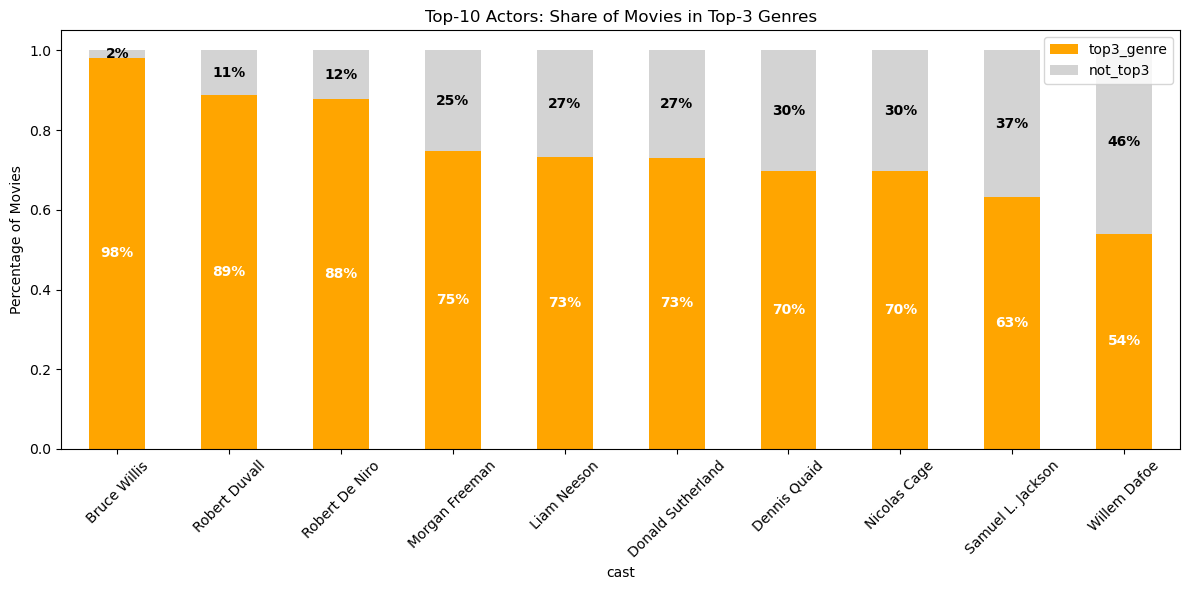

In [81]:
# 1️⃣ Prepare data for stacked bar chart
actor_stats_pct = actor_stats.copy()

# Calculate number of movies NOT in top 3 genres
actor_stats_pct['not_top3'] = actor_stats_pct['all_genres'] - actor_stats_pct['top3_genre']

# Compute proportions
df_plot = actor_stats_pct[['top3_genre', 'not_top3']].div(actor_stats_pct['all_genres'], axis=0)

# 2️⃣ Plot stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=['orange', 'lightgray']
)

plt.ylabel('Percentage of Movies')
plt.title('Top-10 Actors: Share of Movies in Top-3 Genres')
plt.xticks(rotation=45)

# 3️⃣ Add percentage labels on the bars
for i, (top, not_top) in enumerate(zip(df_plot['top3_genre'], df_plot['not_top3'])):
    # Top-3 genres (bottom part)
    ax.text(
        i,
        top / 2,
        f'{top*100:.0f}%',
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

    # Movies outside top-3 genres (top part)
    ax.text(
        i,
        top + not_top / 2,
        f'{not_top*100:.0f}%',
        ha='center',
        va='center',
        color='black',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

This chart gives a clear view of how "specialized" or versatile the top Hollywood actors are in terms of genres.

Key insights:

- **Bruce Willis — the king of consistency (or specialization)**  
  Bruce Willis has the highest specialization: 98% of his movies are concentrated in just three genres. This means he rarely steps outside his usual roles (likely Action, Thriller, and Crime).

- **Willem Dafoe — the most experimental actor**  
  At the opposite end, Willem Dafoe has only 54% of his work in the top-3 genres, while nearly half (46%) spans other genres. This supports his reputation as an actor who frequently works in auteur and experimental films.

- **Categorizing "Specialists" vs. "Generalists"**  
  The chart can be roughly divided into three groups:
  1. **Niche specialists (88%–98%)**: Bruce Willis, Robert Duvall, Robert De Niro — they have found their niche and mostly work within it.  
  2. **Moderate conservatives (70%–75%)**: Morgan Freeman, Liam Neeson, Donald Sutherland, Dennis Quaid, Nicolas Cage — most of their work is predictable, but a quarter of films are surprises.  
  3. **Versatile actors (54%–63%)**: Samuel L. Jackson and Willem Dafoe — they often experiment with different genres.

- **Overall conclusion**  
  The chart reveals an interesting paradox: actors who appear most frequently (like Samuel L. Jackson) tend to have greater genre diversity. Meanwhile, Bruce Willis’s hyper-activity in recent years was paired with strong dedication to only a few proven genres.